In [1]:
# mtg situation:
# opponent casts boring sorcery, I cast flusterstorm with storm = X
# I control a grip of chaos
# no mana for anyone

In [2]:
import random

In [3]:
def resolves(storm):
    # create stack, 0 is original spell, 1 is the first fluster (that will always target the original spell)
    stack = range(storm+2)
#     print "       stack: ", stack

    # redirect each copie of fluster (except the first one)
    redirections = [0, 0] #first two spell on the stack do not get redirected
    for copy in stack[2:]:
        target = copy
        # choose another target (not itself)
        while target == copy:
            target = random.randint(0,storm+1)

        redirections.append(target)

#     print "redirections: ", redirections

    # resolve copies in backwards order
    pos = storm +2
    for target in reversed(redirections[2:]):
        pos -= 1
        if target > pos:
            # target is already resolved
            pass
        elif stack[target] == '-1' :
            # target has been previously countered 
            pass
        else:
            stack[target] = -1
#     print "       stack: ", stack
    
    return stack[0] == 0


In [4]:
print resolves(10)

False


In [5]:
# perform experiments
distribution = [0]
for storm in range(100)[1:]:
    distribution.append(0)
    # do each exp k times
    k = 5000
    for x in range(k):
        if resolves(storm):
            distribution[storm] += 1
    # normalize
    distribution[storm] /= float(k)

In [6]:
print distribution

[0, 0.508, 0.4432, 0.406, 0.4194, 0.408, 0.403, 0.3976, 0.3838, 0.3934, 0.3808, 0.3968, 0.386, 0.392, 0.38, 0.3722, 0.3776, 0.3852, 0.3822, 0.375, 0.393, 0.389, 0.3664, 0.3682, 0.3826, 0.3794, 0.3696, 0.3824, 0.3748, 0.3662, 0.3638, 0.3712, 0.3782, 0.3726, 0.3666, 0.363, 0.368, 0.3636, 0.373, 0.3666, 0.3808, 0.377, 0.3856, 0.3758, 0.3778, 0.376, 0.3654, 0.3822, 0.3644, 0.3762, 0.3624, 0.3718, 0.382, 0.3676, 0.3712, 0.372, 0.3632, 0.3826, 0.375, 0.383, 0.3802, 0.3922, 0.3746, 0.3624, 0.3616, 0.3798, 0.3628, 0.3844, 0.3918, 0.3796, 0.373, 0.3762, 0.379, 0.3812, 0.3742, 0.3688, 0.3606, 0.3686, 0.3676, 0.3814, 0.3738, 0.3674, 0.3644, 0.368, 0.3574, 0.3622, 0.3688, 0.3724, 0.3706, 0.3742, 0.368, 0.3678, 0.3728, 0.3604, 0.3698, 0.3712, 0.3688, 0.3708, 0.3584, 0.3624]


In [7]:
# plot
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 8.0) #adjust to your screen

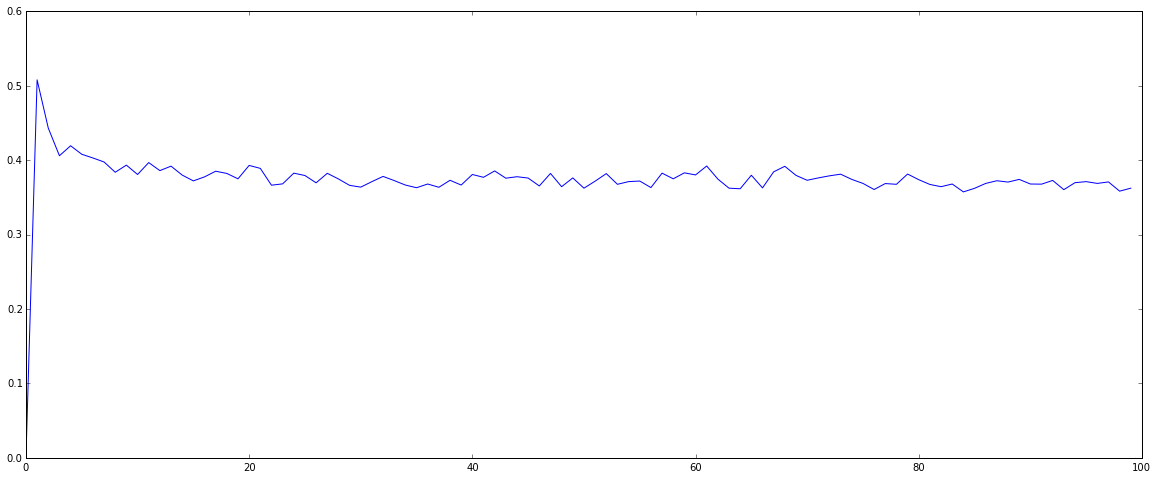

In [8]:
plt.plot(distribution)